In [1]:
!git clone https://github.com/eriklindernoren/PyTorch-YOLOv3
%cd PyTorch-YOLOv3/
!pip3 install poetry --user
!poetry install
!./weights/download_weights.sh
!pip3 install pytorchyolo --user
!poetry run yolo-test --weights weights/yolov3.weights

Cloning into 'PyTorch-YOLOv3'...
remote: Enumerating objects: 2006, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 2006 (delta 17), reused 10 (delta 1), pack-reused 1970
Receiving objects: 100% (2006/2006), 16.73 MiB | 24.97 MiB/s, done.
Resolving deltas: 100% (1201/1201), done.
/content/PyTorch-YOLOv3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.4/249.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.7/514.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.8/453.8 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 19

In [5]:
import cv2
from pytorchyolo import detect, models

# Load the YOLO model
model = models.load_model(
  "/content/PyTorch-YOLOv3/config/yolov3.cfg",
  "/content/PyTorch-YOLOv3/yolov3.weights")

# Load the image as a numpy array
img = cv2.imread("/content/drive/MyDrive/SAM SLAM/understanding sambeddings/testimgs/road_traffic_1.jpg")

# Convert OpenCV bgr to rgb
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Runs the YOLO model on the image
boxes = detect.detect_image(model, img)

print(boxes)
# Output will be a numpy array in the following format:
# [[x1, y1, x2, y2, confidence, class]]

[[9.38737732e+02 3.56797668e+02 1.11700476e+03 8.30771606e+02
  9.98528421e-01 0.00000000e+00]
 [1.16512079e+01 4.35413971e+02 5.64361389e+02 8.45168213e+02
  9.97930586e-01 2.00000000e+00]
 [2.16493317e+02 3.36209625e+02 8.32117371e+02 5.82193298e+02
  9.95665252e-01 2.00000000e+00]
 [5.83835144e+02 2.67602814e+02 8.31789062e+02 3.93048645e+02
  9.90988851e-01 5.00000000e+00]
 [7.02244080e+02 3.50807983e+02 9.83361694e+02 4.97988556e+02
  9.83784437e-01 2.00000000e+00]
 [4.41015472e+01 3.30092133e+02 2.47059738e+02 4.08589172e+02
  9.64357316e-01 2.00000000e+00]
 [8.36763306e+02 1.47399628e+02 8.59325073e+02 2.09228638e+02
  9.32020962e-01 9.00000000e+00]
 [6.95836544e-01 3.40390594e+02 7.27887802e+01 3.98558716e+02
  9.13877606e-01 2.00000000e+00]
 [1.03989941e+03 3.60702148e+02 1.19367358e+03 6.85441223e+02
  8.95604789e-01 2.00000000e+00]
 [9.44328690e+01 1.74424240e+02 1.19431107e+02 2.22187042e+02
  7.98654377e-01 9.00000000e+00]
 [5.52720154e+02 1.67525070e+02 5.76930298e+02 2.2

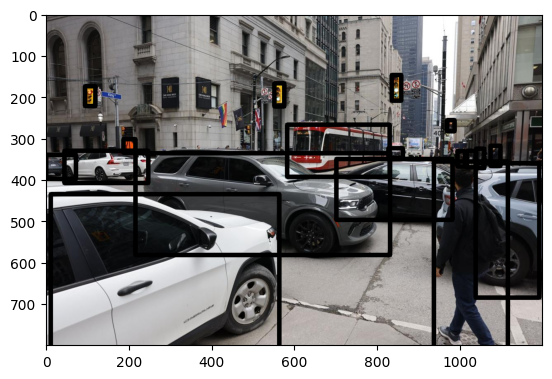

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import torch
img = cv2.imread("/content/drive/MyDrive/SAM SLAM/understanding sambeddings/testimgs/road_traffic_1.jpg")
for box in boxes:
  img = cv2.rectangle(img, box[:2].astype(int), box[2:4].astype(int), (0,0,0), 10)

plt.imshow(img[:, :, ::-1])

In [42]:
model.module_list[1]


Sequential(
  (conv_1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (batch_norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (leaky_1): LeakyReLU(negative_slope=0.1)
)

In [45]:
from torchsummary import summary

summary(model, (3, 416, 416))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 416, 416]             864
       BatchNorm2d-2         [-1, 32, 416, 416]              64
         LeakyReLU-3         [-1, 32, 416, 416]               0
            Conv2d-4         [-1, 64, 208, 208]          18,432
       BatchNorm2d-5         [-1, 64, 208, 208]             128
         LeakyReLU-6         [-1, 64, 208, 208]               0
            Conv2d-7         [-1, 32, 208, 208]           2,048
       BatchNorm2d-8         [-1, 32, 208, 208]              64
         LeakyReLU-9         [-1, 32, 208, 208]               0
           Conv2d-10         [-1, 64, 208, 208]          18,432
      BatchNorm2d-11         [-1, 64, 208, 208]             128
        LeakyReLU-12         [-1, 64, 208, 208]               0
           Conv2d-13        [-1, 128, 104, 104]          73,728
      BatchNorm2d-14        [-1, 128, 1